In [111]:
import numpy as np

original = np.random.random((28, 28))

flat = original.flatten()


def get_transform(width, height, angle, offset_x, offset_y):
    transform = np.zeros((width*height, width*height))
    for i in range(width):
        for j in range(height):
            ii = (i-offset_x)*np.cos(angle) - (j-offset_y)*np.sin(angle)
            jj = (i-offset_x)*np.sin(angle) + (j-offset_y)*np.cos(angle)
            
            iii = int(ii+offset_x)
            jjj = int(jj+offset_y)
            
            x2 = (ii+offset_x) - iii
            y2 = (jj+offset_y) - jjj
            x1 = 1-x2
            y1 = 1-y2
            
            amount = np.array([x1*x1, x1*y2, x2*y2, x2*y1])
            amount /= np.sum(amount)
            
            
            if 0 <=iii <width and 0<=jjj<height:        
                transform[i+width*j, iii+width*jjj] += amount[0]
                if jjj+1 < height:
                    transform[i+width*j, iii+width*(jjj+1)] += amount[1]
                    if iii+1 < width:
                        transform[i+width*j, iii+1+width*(jjj+1)] += amount[2]
                if iii+1 < width:
                    transform[i+width*j, iii+1+width*jjj] += amount[3]
    return transform
    



In [112]:
t = get_transform(3, 3, np.pi/2, 1, 1)

In [113]:
print t

[[  0.00000000e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   5.00000000e-01   0.00000000e+00
    0.00000000e+00   5.00000000e-01   0.00000000e+00   0.00000000e+00
    0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    1.00000000e+00]
 [  1.23259516e-32   1.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    1.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00
    0.00000000e+00]
 [  1.00000000e+00   0.00000000e+00   0.

In [114]:
test_in = np.linspace(0, 1, 9)
test_out = np.dot(t, test_in)

In [115]:
test_out

array([  2.50000000e-01,   4.37500000e-01,   1.00000000e+00,
         1.25000000e-01,   5.00000000e-01,   8.75000000e-01,
         4.16333634e-17,   3.75000000e-01,   7.50000000e-01])

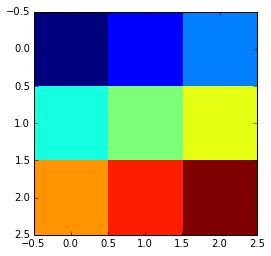

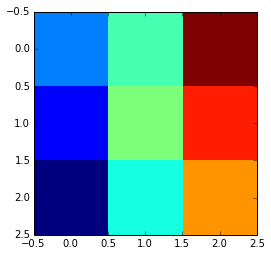

In [116]:
%matplotlib inline
import pylab
pylab.figure()
pylab.imshow(test_in.reshape(3, 3), vmax=1, vmin=0, interpolation='nearest')
pylab.figure()
pylab.imshow(test_out.reshape(3, 3), vmax=1, vmin=0, interpolation='nearest')
